In [1]:
from src.factoring.yolo_manager_factory import YoloManagerFactory

In [2]:
mng = YoloManagerFactory.get_final_dl_manager("detection_model.onnx")

In [2]:
import cv2

img = cv2.imread("E:\\y_test\\cabc30fc-e7726578.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
res = mng.predict(img)

Prediction start



0: 640x640 1 person, 3 cars, 56.0ms
Speed: 3.5ms preprocess, 56.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Prediction succeeded


In [22]:
img

array([[[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 21,  21,  31],
        [ 20,  20,  30],
        [ 20,  20,  30]],

       [[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 21,  21,  31],
        [ 20,  20,  30],
        [ 20,  20,  30]],

       [[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 22,  22,  32],
        [ 21,  21,  31],
        [ 21,  21,  31]],

       ...,

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]],

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]],

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]]

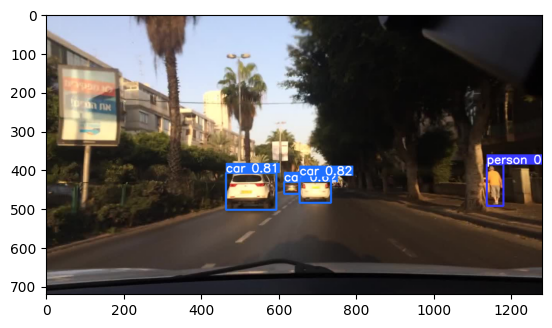

In [11]:
import matplotlib.pyplot as plt

for img in res:
    plt.imshow(img)

In [6]:
res = mng.predict([img, img])

Prediction start



0: 640x640 (no detections), 50.5ms
Speed: 3.0ms preprocess, 50.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 77.5ms
Speed: 3.5ms preprocess, 77.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Prediction succeeded


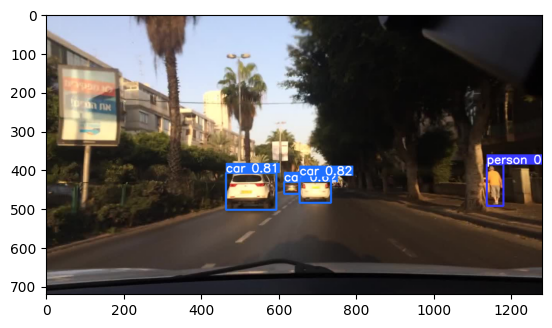

In [8]:
for img in res:
    plt.imshow(img)

In [1]:
import yaml
from os import path

yamls_path = path.join("..", "..", "yaml")
models_path = path.join("..", "..", "models")
print(path.exists(yamls_path), path.exists(models_path))

True True


In [2]:
hyperparams_path = path.join(yamls_path, "yolo_hyperparams_1.yaml")
settings_path = path.join(yamls_path, "settings.yaml")
model_path = path.join(models_path, "detection_model.onnx")

print(path.exists(hyperparams_path), path.exists(settings_path), path.exists(model_path))

True True True


In [3]:
with open(hyperparams_path) as f:
    d = yaml.safe_load(f.read())

print(d)

{'epochs': 50, 'batch': 16, 'save': True, 'save_period': 10, 'exist_ok': False, 'verbose': True, 'device': 'cpu', 'pretrained': False}


In [6]:
from src.factoring.yolo_manager_factory import YoloManagerFactory

with open(settings_path) as f:
    settings = yaml.safe_load(f.read())

print(settings)

{'secret-key': '9572df62a06cc64d5f476e95ea733500fd4d7419', 'project-name': 'test-yolov8'}


In [5]:
yolo_mng = YoloManagerFactory.get_final_dl_manager(model_path, settings)

wandb: Currently logged in as: osgolovkina (hse-mlhs-cv4-2023). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Zeroxin/.netrc


wandb: WARNING The wandb callback is currently in beta and is subject to change based on updates to `ultralytics yolov8`.
wandb: WARNING         The callback is tested and supported for ultralytics v8.0.43 and above.
wandb: WARNING         Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.
wandb: WARNING         


In [7]:
yolo_mng.predict(img)

Prediction start


Loading ..\..\models\detection_model.onnx for ONNX Runtime inference...

0: 640x640 1 person, 3 cars, 54.0ms
Speed: 5.5ms preprocess, 54.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Prediction succeeded


array([[[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 21,  21,  31],
        [ 20,  20,  30],
        [ 20,  20,  30]],

       [[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 21,  21,  31],
        [ 20,  20,  30],
        [ 20,  20,  30]],

       [[191, 204, 236],
        [191, 204, 236],
        [191, 204, 236],
        ...,
        [ 22,  22,  32],
        [ 21,  21,  31],
        [ 21,  21,  31]],

       ...,

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]],

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]],

       [[ 42,  39,  48],
        [ 42,  39,  48],
        [ 42,  39,  48],
        ...,
        [ 13,  13,  15],
        [ 13,  13,  15],
        [ 13,  13,  15]]

In [7]:
from ultralytics import YOLO

In [8]:
model = YOLO("yolov8n.pt")

In [10]:
model.export(format="onnx", opset=12)

Ultralytics YOLOv8.0.120  Python-3.9.0 torch-2.0.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from yolov8n.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.0 opset 12...
ONNX: export success  2.1s, saved as yolov8n.onnx (12.2 MB)

Export complete (3.5s)
Results saved to E:\\year_proj\00_repos\annual-main-project\src\notebooks
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640 
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml 
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'yolov8n.onnx'

In [3]:
from src.factoring.yolo_manager_factory import YoloManagerFactory

yolo_mng = YoloManagerFactory.get_final_dl_manager("detection_model_12.onnx")

In [6]:
import cv2

img = cv2.imread("E:\\y_test\\cabc30fc-e7726578.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
res = yolo_mng.predict([img, img])

Prediction start



0: 640x640 1 person, 3 cars, 49.5ms
Speed: 3.0ms preprocess, 49.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 3 cars, 49.0ms
Speed: 3.0ms preprocess, 49.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Prediction succeeded


In [9]:
res

[array([[[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 21,  21,  31],
         [ 20,  20,  30],
         [ 20,  20,  30]],
 
        [[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 21,  21,  31],
         [ 20,  20,  30],
         [ 20,  20,  30]],
 
        [[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 22,  22,  32],
         [ 21,  21,  31],
         [ 21,  21,  31]],
 
        ...,
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
         [ 13,  13,  15],
         [ 13,  13,  15]],
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
         [ 13,  13,  15],
         [ 13,  13,  15]],
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
  

In [15]:
res

[array([[[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 21,  21,  31],
         [ 20,  20,  30],
         [ 20,  20,  30]],
 
        [[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 21,  21,  31],
         [ 20,  20,  30],
         [ 20,  20,  30]],
 
        [[191, 204, 236],
         [191, 204, 236],
         [191, 204, 236],
         ...,
         [ 22,  22,  32],
         [ 21,  21,  31],
         [ 21,  21,  31]],
 
        ...,
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
         [ 13,  13,  15],
         [ 13,  13,  15]],
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
         [ 13,  13,  15],
         [ 13,  13,  15]],
 
        [[ 42,  39,  48],
         [ 42,  39,  48],
         [ 42,  39,  48],
         ...,
         [ 13,  13,  15],
  

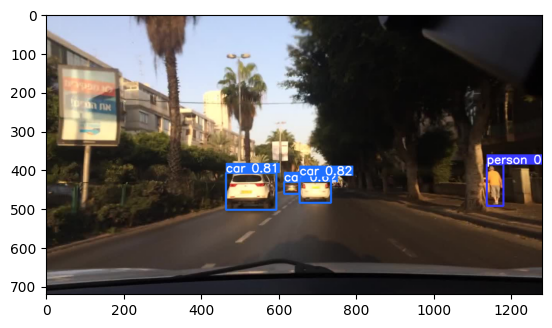

In [17]:
import matplotlib.pyplot as plt

for i in res:
    plt.imshow(i)

plt.show()

In [4]:
from src.factoring.yolo_manager_factory import YoloManagerFactory

yolo_mng_tr = YoloManagerFactory.get_final_dl_manager("yolov8n.pt")
data_path = path.join(yamls_path, "yolo_config.yaml")
yolo_mng_tr.train(data_path, d)

Train start


Ultralytics YOLOv8.0.120  Python-3.9.0 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=..\..\yaml\yolo_config.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opse

train: Scanning E:\temp\datasets\train... 69863 images, 137 backgrounds, 0 corrupt: 100%|██████████| 70000/70000 [01:18<00:00, 896.43it/s]
train: WARNING  E:\temp\datasets\train\75055858-7d04a650.jpg: 1 duplicate labels removed
train: New cache created: E:\temp\datasets\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning E:\temp\datasets\val... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:14<00:00, 684.79it/s]
val: New cache created: E:\temp\datasets\val.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Insta

KeyboardInterrupt: 